# 1. Problem formulation:

Opis problemu

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import cmdstanpy

BINS = 20

In [20]:
audi_a3_2000ccm_standarized = pd.read_csv("data/audi_data_standarized.csv")
audi_a3_2000ccm_standarized.head()

,Price,Production_year,Mileage_km
0,0.190769,0.739130,0.472726
1,0.037814,0.434783,0.515908
2,0.071804,0.434783,0.713306
3,0.063306,0.391304,0.549999
4,0.076053,0.347826,0.545454


# 2. Model

Opis modeli

## 2.1 Model 1- prior

In [21]:
model_exp1_ppc = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model1_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/stan_files/exp_model1_ppc.stan to exe file /home/DA/project/stan_files/exp_model1_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/stan_files/exp_model1_ppc


In [22]:
N = len(audi_a3_2000ccm_standarized)

data = {"N": N, 
        "mileage" : np.linspace(0.01,1,N),
        "production_year" : np.linspace(0.01,1,N)
}
sim_exp_fit1=model_exp1_ppc.sample(data=data)
sim_exp_fit1_pd = sim_exp_fit1.draws_pd()
sim_exp_fit1_pd.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)




chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)
chain 1 |███▋      | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████▌     | 00:00 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,price[1],price[2],price[3],price[4],price[5],price[6],price[7],price[8],...,price[773],price[774],price[775],price[776],price[777],price[778],alpha,beta,sigma,lambda
0,0.0,0.0,0.010483,0.186081,0.197503,0.247440,0.080363,0.037190,0.084933,0.037599,...,0.010182,0.175230,0.004375,0.056288,0.019093,0.189023,0.179842,0.377599,0.178870,39.9479
1,0.0,0.0,0.055046,0.547342,0.080762,0.092106,0.002378,0.073745,0.148451,0.018516,...,0.021830,0.005627,0.039108,0.023691,0.005499,0.035175,0.131498,0.376984,0.148069,40.2771
2,0.0,0.0,0.120154,0.087497,0.033580,0.044801,0.095398,0.237114,0.010745,0.116041,...,0.044640,0.022521,0.036215,0.043418,0.040164,0.015678,0.215718,0.340316,0.145261,40.0823
3,0.0,0.0,0.139416,0.079573,0.003782,0.182980,0.066802,0.035443,0.193456,0.043539,...,0.006364,0.004573,0.029843,0.037139,0.029465,0.000574,0.197995,0.381688,0.160845,40.2915
4,0.0,0.0,0.029503,0.256703,0.021521,0.095546,0.021208,0.526349,0.006127,0.117595,...,0.054499,0.003597,0.042691,0.001605,0.003117,0.056918,0.201187,0.381161,0.152878,39.9140


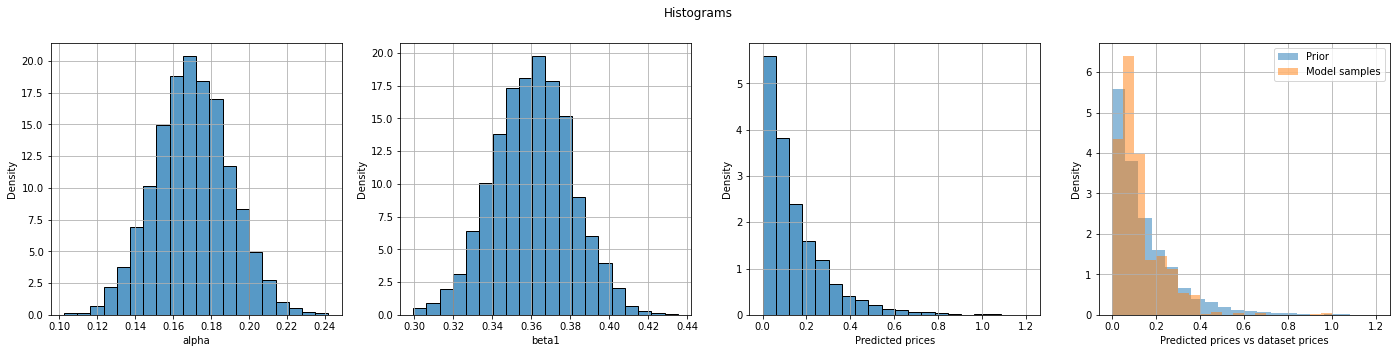

In [23]:
_, ax = plt.subplots(1, 4, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_fit1_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_fit1_pd, x="beta", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_fit1_pd, x="price[1]", stat="density", ax=ax[2], bins=BINS)

ax[3].hist(sim_exp_fit1_pd["price[1]"], bins=BINS, alpha=0.5, density=True, label="Prior")
ax[3].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("Predicted prices"), 
ax[3].set_xlabel("Predicted prices vs dataset prices")

ax[3].set_ylabel("Density")
ax[3].legend()
plt.suptitle("Histograms")
plt.show()

## 2.2 Model 1- posterior

In [24]:
model_exp_fit = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model1_fit.stan')
N = len(audi_a3_2000ccm_standarized)
#Parameters

data = {"N": N, 
        "mileage" : audi_a3_2000ccm_standarized['Mileage_km'],
        "production_year" : audi_a3_2000ccm_standarized['Production_year'],
        "price_observed": audi_a3_2000ccm_standarized['Price']
        }

sim_exp_pos2_fit=model_exp_fit.sample(data=data)
sim_exp_pos1_fit_pd = sim_exp_pos2_fit.draws_pd()
sim_exp_pos1_fit_pd.head()

INFO:cmdstanpy:compiling stan file /home/DA/project/stan_files/exp_model1_fit.stan to exe file /home/DA/project/stan_files/exp_model1_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/stan_files/exp_model1_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:02 Iteration: 1400 /


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_likelihood[769],log_likelihood[770],log_likelihood[771],log_likelihood[772],log_likelihood[773],log_likelihood[774],log_likelihood[775],log_likelihood[776],log_likelihood[777],log_likelihood[778]
0,691.624,0.881449,0.464724,2.0,3.0,0.0,-690.137,0.162398,0.100187,0.161852,...,1.12794,1.51028,1.13167,1.69500,0.876238,1.26416,0.093945,1.40643,1.46144,0.870422
1,690.612,0.994581,0.464724,3.0,15.0,0.0,-689.730,0.131002,0.124104,0.141228,...,1.12782,1.44796,1.13123,1.61838,0.897488,1.26484,0.165617,1.36295,1.45257,0.892790
2,689.157,0.934934,0.464724,3.0,7.0,0.0,-687.973,0.126581,0.141765,0.147349,...,1.12866,1.45152,1.13215,1.62547,0.893872,1.26443,0.128534,1.36723,1.46020,0.887819
3,692.589,0.990659,0.464724,2.0,7.0,0.0,-687.719,0.147730,0.119397,0.145052,...,1.12873,1.48842,1.13237,1.66875,0.883624,1.26410,0.103887,1.39228,1.46167,0.877375
4,691.728,0.987393,0.464724,3.0,7.0,0.0,-691.189,0.157045,0.084945,0.180067,...,1.12860,1.48320,1.13209,1.65717,0.892073,1.26401,0.176123,1.38577,1.44593,0.888362


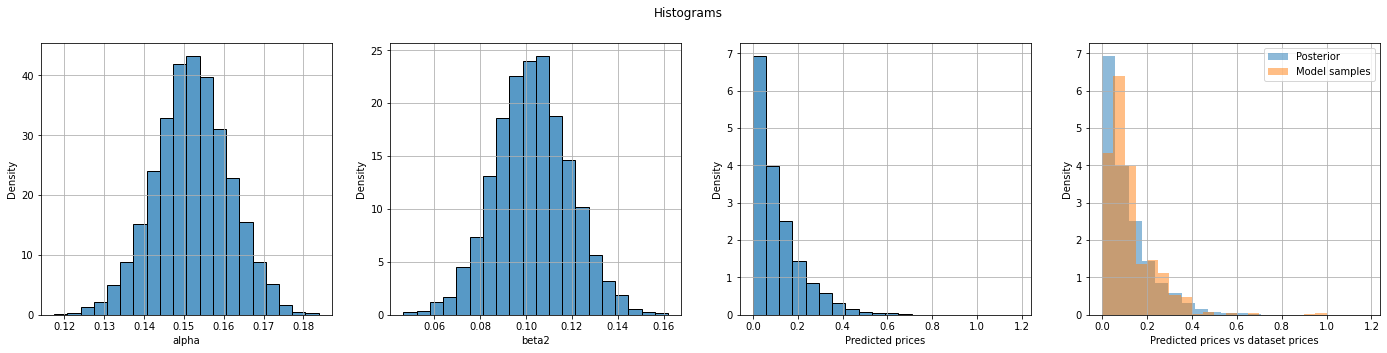

In [25]:
_, ax = plt.subplots(1, 4, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_pos1_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_pos1_fit_pd, x="beta", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_pos1_fit_pd, x="price_estimated[1]", stat="density", ax=ax[2], bins=BINS)

ax[3].hist(sim_exp_pos1_fit_pd["price_estimated[1]"], bins=BINS, alpha=0.5, density=True, label="Posterior")
ax[3].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta2"), 
ax[2].set_xlabel("Predicted prices"), 
ax[3].set_xlabel("Predicted prices vs dataset prices")

ax[3].set_ylabel("Density")
ax[3].legend()
plt.suptitle("Histograms")
plt.show()

## 2.3 Model 2- prior

In [26]:
model_exp2_ppc = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model2_ppc.stan')

#Parameters
N = len(audi_a3_2000ccm_standarized)
mu_a =0.17
sig_a =0.02
mu_b1 = 0.36
sig_b1 = 0.02
mu_b2 = 0.36
sig_b2 = 0.02

data = {"N": N, 
        "mileage" : np.linspace(0.01,1,N),
        "production_year" : np.linspace(0.01,1,N),
        "mu_a" : mu_a,
        "sig_a" : sig_a,
        "mu_b1" : mu_b1,
        "mu_b2" : mu_b2,
        "sig_b1" : sig_b1,
        "sig_b2" : sig_b2,
        }


sim_exp_pos2_fit=model_exp2_ppc.sample(data=data)
sim_exp_pos2_fit_pd = sim_exp_pos2_fit.draws_pd()
sim_exp_pos2_fit_pd.head()

INFO:cmdstanpy:compiling stan file /home/DA/project/stan_files/exp_model2_ppc.stan to exe file /home/DA/project/stan_files/exp_model2_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/stan_files/exp_model2_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▋      | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████▌     | 00:00 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                      

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,price[1],price[2],price[3],price[4],price[5],price[6],price[7],price[8],...,price[774],price[775],price[776],price[777],price[778],alpha,beta1,beta2,sigma,lambda
0,0.0,0.0,0.065694,0.158319,0.155073,0.142665,0.290858,0.080155,0.064062,0.112980,...,0.062938,0.033903,0.002172,0.003522,0.006855,0.173143,0.359830,0.374653,0.135255,40.1154
1,0.0,0.0,0.216884,0.092536,0.062386,0.096242,0.125246,0.008355,0.427776,0.155696,...,0.036092,0.492338,0.087814,0.068663,0.000100,0.166484,0.380005,0.363070,0.185911,39.7486
2,0.0,0.0,0.173746,0.193694,0.288808,0.064963,0.124711,0.058869,0.241683,0.032572,...,0.033849,0.095111,0.100282,0.065399,0.041622,0.163970,0.323690,0.346217,0.175041,39.7808
3,0.0,0.0,0.048962,0.009015,0.105281,0.183816,0.835610,0.056655,0.238106,0.229922,...,0.158825,0.135477,0.002298,0.093387,0.206939,0.149206,0.363970,0.387653,0.146021,39.8795
4,0.0,0.0,0.012976,0.458250,0.321535,0.327257,0.013371,0.079325,0.239139,0.041856,...,0.007716,0.019044,0.400236,0.040256,0.089349,0.134718,0.367802,0.363671,0.167198,39.9382


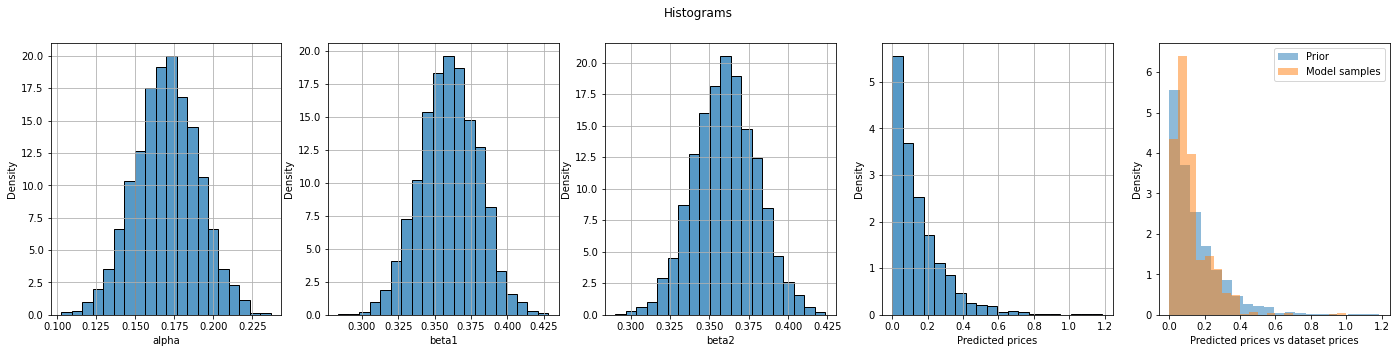

In [27]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_pos2_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="price[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_pos2_fit_pd["price[1]"], bins=BINS, alpha=0.5, density=True, label="Prior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

## 2.4 Model 2- posterior

In [29]:
model_exp_fit = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model2_fit.stan')
N = len(audi_a3_2000ccm_standarized)
#Parameters

data = {"N": N, 
        "mileage" : audi_a3_2000ccm_standarized['Mileage_km'],
        "production_year" : audi_a3_2000ccm_standarized['Production_year'],
        "price_observed": audi_a3_2000ccm_standarized['Price']
        }

sim_exp_pos2_fit=model_exp_fit.sample(data=data)
sim_exp_pos2_fit_pd = sim_exp_pos2_fit.draws_pd()
sim_exp_pos2_fit_pd.head()

INFO:cmdstanpy:compiling stan file /home/DA/project/stan_files/exp_model2_fit.stan to exe file /home/DA/project/stan_files/exp_model2_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/stan_files/exp_model2_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,log_likelihood[769],log_likelihood[770],log_likelihood[771],log_likelihood[772],log_likelihood[773],log_likelihood[774],log_likelihood[775],log_likelihood[776],log_likelihood[777],log_likelihood[778]
0,561.851,0.906021,0.394488,2.0,7.0,0.0,-560.475,0.208565,0.134397,0.099192,...,1.12825,1.49562,1.12965,1.59963,0.879012,1.25247,0.142357,1.31991,1.47529,0.871800
1,559.732,0.910725,0.394488,3.0,7.0,0.0,-558.249,0.213577,0.127815,0.082194,...,1.12842,1.50215,1.12963,1.61086,0.879373,1.25653,0.158855,1.32956,1.47444,0.873231
2,558.714,0.985661,0.394488,3.0,15.0,0.0,-555.911,0.194635,0.095200,0.096218,...,1.12858,1.49534,1.13105,1.62235,0.881346,1.25893,0.144007,1.34540,1.47279,0.875018
3,557.019,0.855565,0.394488,4.0,15.0,0.0,-556.257,0.197485,0.087551,0.099889,...,1.12717,1.51078,1.13242,1.65049,0.872422,1.25599,0.104918,1.36571,1.47404,0.865227
4,558.910,0.998029,0.394488,4.0,15.0,0.0,-554.985,0.224449,0.120678,0.078605,...,1.12625,1.52468,1.13220,1.65117,0.867124,1.25356,0.117824,1.35956,1.47506,0.860481


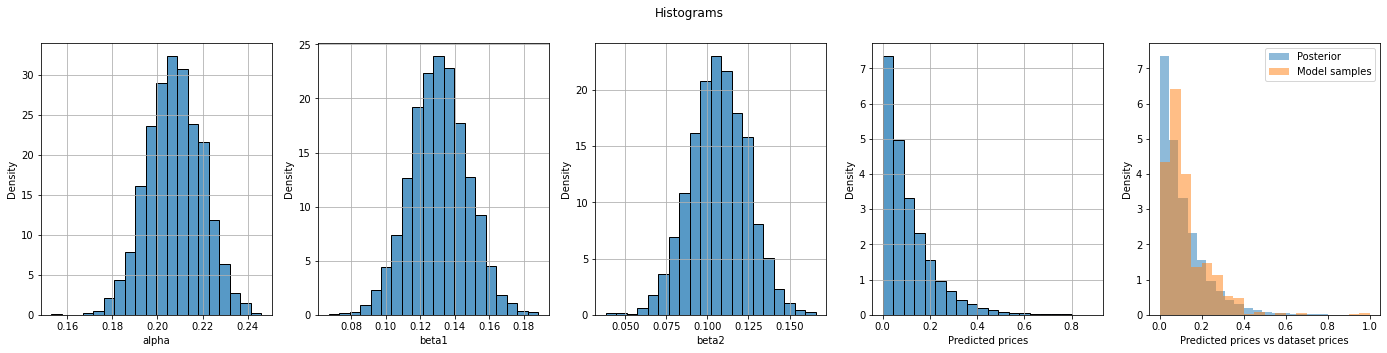

In [30]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_pos2_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_pos2_fit_pd, x="price_estimated[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_pos2_fit_pd["price_estimated[1]"], bins=BINS, alpha=0.5, density=True, label="Posterior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

# 3. Model comparison